In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('medallists.csv')

# Display basic information about the dataset
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   medal_date    1747 non-null   object
 1   medal_type    1747 non-null   object
 2   medal_code    1747 non-null   int64 
 3   name          1732 non-null   object
 4   gender        1732 non-null   object
 5   country       1732 non-null   object
 6   country_code  1732 non-null   object
 7   nationality   1731 non-null   object
 8   team          1093 non-null   object
 9   team_gender   1093 non-null   object
 10  discipline    1747 non-null   object
 11  event         1747 non-null   object
 12  event_type    1747 non-null   object
 13  url_event     1747 non-null   object
 14  birth_date    1732 non-null   object
 15  code          1747 non-null   object
dtypes: int64(1), object(15)
memory usage: 218.5+ KB
None
        medal_code
count  1747.000000
mean      2.047510
std       0.824544
min

In [10]:
# Convert dates to datetime
df['medal_date'] = pd.to_datetime(df['medal_date'])
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Handle missing values
df = df.dropna()

# Calculate age at the time of winning the medal
df['age_at_medal'] = (df['medal_date'] - df['birth_date']).dt.days // 365


In [ ]:
#Top 10 Countries by Medal Count

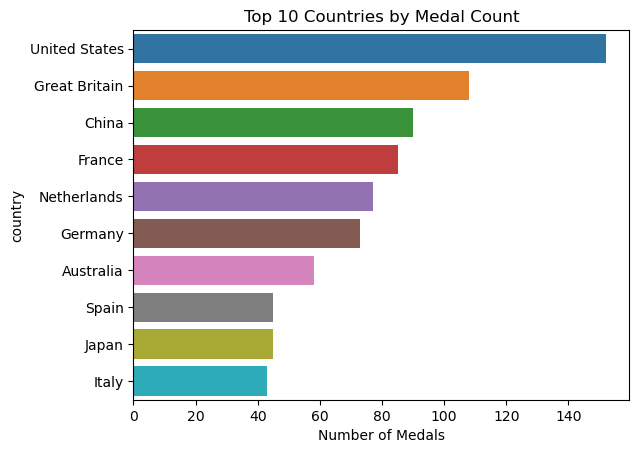

In [11]:
medal_by_country = df['country'].value_counts().head(10)
sns.barplot(x=medal_by_country.values, y=medal_by_country.index)
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Number of Medals')
plt.show()


In [ ]:
#Gender Distribution of Medalists

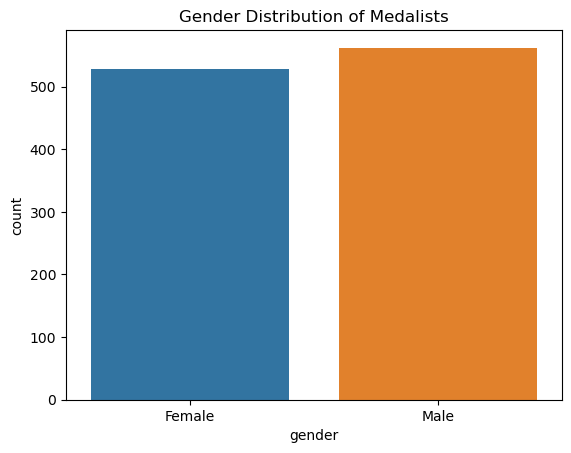

In [12]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution of Medalists')
plt.show()

In [ ]:
#Age Distribution of Medalists

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


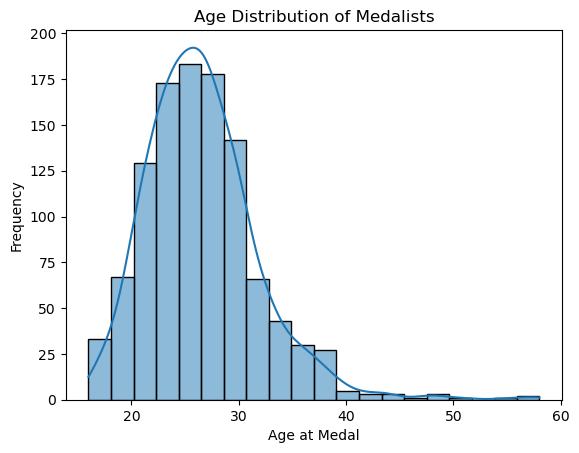

In [13]:
sns.histplot(df['age_at_medal'], bins=20, kde=True)
plt.title('Age Distribution of Medalists')
plt.xlabel('Age at Medal')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Medal Distribution by Discipline:

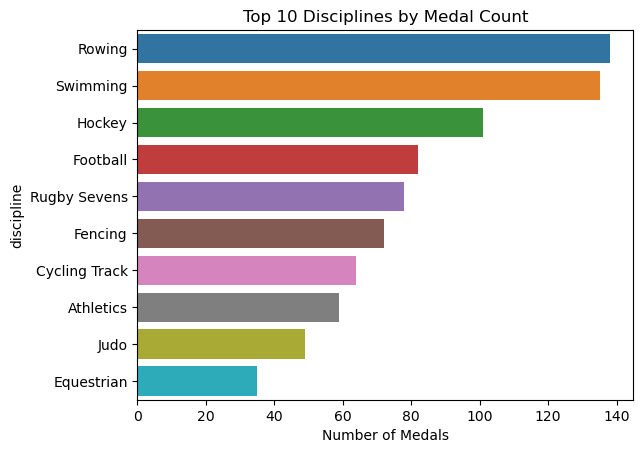

In [14]:
medal_by_discipline = df['discipline'].value_counts().head(10)
sns.barplot(x=medal_by_discipline.values, y=medal_by_discipline.index)
plt.title('Top 10 Disciplines by Medal Count')
plt.xlabel('Number of Medals')
plt.show()


In [ ]:
#Medal Type Distribution by Gender

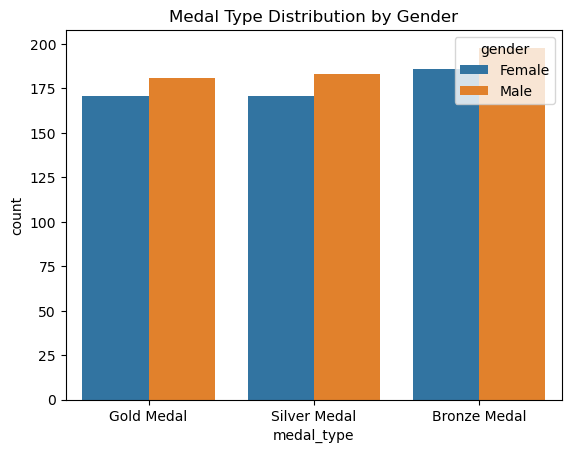

In [16]:
sns.countplot(x='medal_type', hue='gender', data=df)
plt.title('Medal Type Distribution by Gender')
plt.show()


In [ ]:
#Performance Comparison Between Genders Across Disciplines

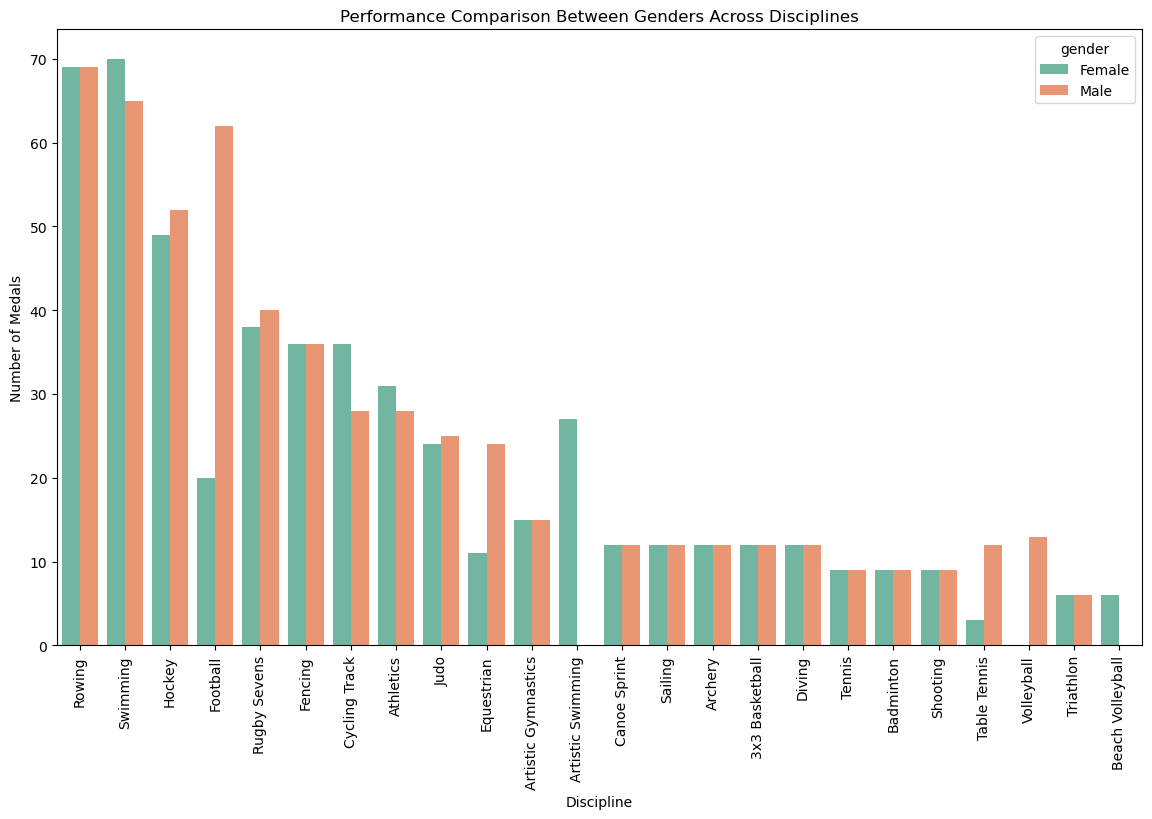

In [19]:
plt.figure(figsize=(14, 8))
sns.countplot(x='discipline', hue='gender', data=df, order=df['discipline'].value_counts().index, palette='Set2')
plt.title('Performance Comparison Between Genders Across Disciplines')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()


In [21]:
#Medal Type Distribution by Country and Gender

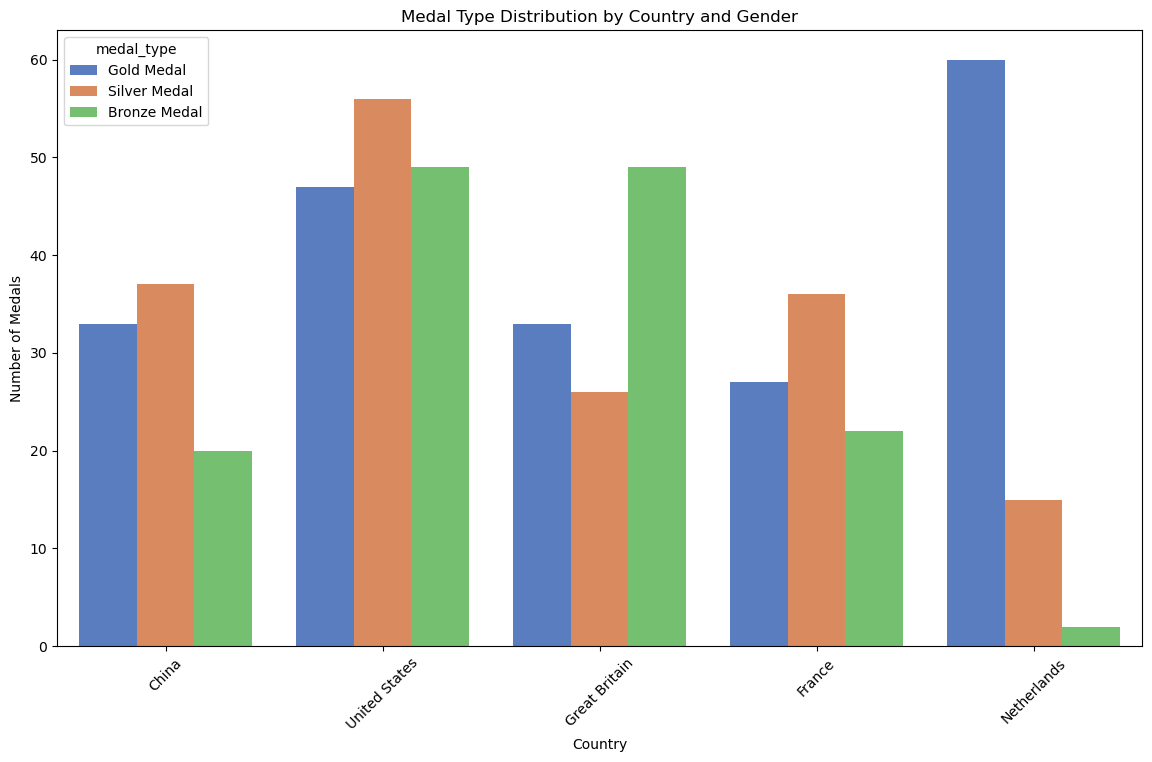

In [20]:
plt.figure(figsize=(14, 8))
sns.countplot(x='country', hue='medal_type', data=df[df['country'].isin(top_countries)], palette='muted')
plt.title('Medal Type Distribution by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()